In [1]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
# ! pip install qutip # necessary for Google Colab
from qutip import (
    Qobj,
    Bloch,
    basis,
    sigmax,
    sigmay,
    sigmaz,
    qeye,
    commutator,
    expect
)
import matplotlib.pyplot as plt

### Reference links about QuTip


*   Bloch Sphere: https://qutip.readthedocs.io/en/qutip-5.0.x/guide/guide-bloch.html
*   Manipulating States and Operators: https://qutip.readthedocs.io/en/qutip-5.0.x/guide/guide-states.html
*   Introduction to QuTip: https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v5/lectures/Lecture-0-Introduction-to-QuTiP.ipynb
*   Tutorial of QuTip: https://qutip.org/qutip-tutorials/
*   Useful functions: https://qutip.readthedocs.io/en/qutip-5.0.x/guide/guide-basics.html#functions-operating-on-qobj-class



# State Vectors
The following are some common quantum state vectors in Dirac notation:
\begin{align}
|0\rangle &= (1, 0)^T\\
|1\rangle &= (0, 1)^T\\
\langle 0| &= |0\rangle^\dagger = (1, 0)\\
\langle 1| &= |1\rangle^\dagger = (0, 1)\\
|+\rangle &= \frac{1}{\sqrt{2}}(1, 1)^T\\
|-\rangle &= \frac{1}{\sqrt{2}}(1, -1)^T\\
|+i\rangle &= \frac{1}{\sqrt{2}}(1, i)^T\\
|-i\rangle &= \frac{1}{\sqrt{2}}(1, -i)^T\\
\end{align}
## Working with QuTiP

In QuTiP, quantum states can be created in various ways:

- The `basis(N, i)` function generates the `i`-th basis state in an `N`-dimensional Hilbert space.
- The `Qobj` class allows the creation of quantum objects from Python lists, NumPy arrays, or matrices.
- The conjugate transpose of a `Qobj` instance can be obtained using the `dag()` method.

For more details, refer to the [QuTiP tutorial](https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v5/lectures/Lecture-0-Introduction-to-QuTiP.ipynb).


In [2]:
# |0> state (ground state) (column vector)
g_state =  basis(2, 0)
print(g_state)

# |1> state (excited state)
e_state =  basis(2, 1)
print(e_state)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]


In [3]:
# <0| vector (row vector, complex conjugate of |0>)
g_state_dag = g_state.dag()
print(g_state_dag)

# <1| vector (row vector)
e_state_dag = e_state.dag()
print(e_state_dag)

Quantum object: dims=[[1], [2]], shape=(1, 2), type='bra', dtype=Dense
Qobj data =
[[1. 0.]]
Quantum object: dims=[[1], [2]], shape=(1, 2), type='bra', dtype=Dense
Qobj data =
[[0. 1.]]


In [4]:
# another way of difinition
# |0> state (ground state) (column vector)
g_state = Qobj([[1],[0]])
print(g_state)

# |1> state (excited state)
e_state = Qobj([[0],[1]])
print(e_state)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]


In [5]:
# another way of difinition
# <0| vector
g_state_dag = Qobj([[1,0]])
print(g_state_dag)

# <1| vector
e_state_dag = Qobj([[0,1]])
print(e_state_dag)

Quantum object: dims=[[1], [2]], shape=(1, 2), type='bra', dtype=Dense
Qobj data =
[[1. 0.]]
Quantum object: dims=[[1], [2]], shape=(1, 2), type='bra', dtype=Dense
Qobj data =
[[0. 1.]]


In [6]:
# |+> state
plus_state = (1/np.sqrt(2))*(g_state + e_state)
print(plus_state)

# |-> state
minus_state = (1/np.sqrt(2))*(g_state - e_state)
print(minus_state)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.70710678]
 [-0.70710678]]


In [7]:
# |+i> state
plus_i_state = (1/np.sqrt(2))*(g_state + 1j*e_state)
print(plus_i_state)

# |-i> state
minus_i_state = (1/np.sqrt(2))*(g_state - 1j*e_state)
print(minus_i_state)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678+0.j        ]
 [0.        -0.70710678j]]


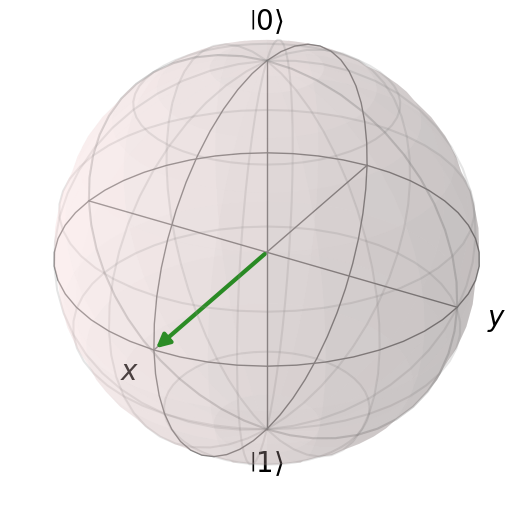

In [8]:
# plot |+> state on a bloch sphere
b = Bloch()
b.make_sphere()
b.add_states(plus_state)
b.render()
b.show()

# Pauli operators
\begin{align}
I &\equiv
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
\qquad
X \equiv
\begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}\\
Y &\equiv
\begin{bmatrix}
0 & -i \\
i & 0 \\
\end{bmatrix}
\quad
Z \equiv
\begin{bmatrix}
1 & 0 \\
0 & -1 \\
\end{bmatrix}
\end{align}

In [9]:
# Identity operator
print(qeye(2))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0.]
 [0. 1.]]


In [10]:
# Sigma X operator
print(sigmax())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]


In [11]:
# Sigma Y operator
print(sigmay())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]


In [12]:
# Sigma Z operator
print(sigmaz())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]


In [13]:
# another way of difinition of sigmax operator
sigmax_op = Qobj([[0,1],[1,0]])
print(sigmax_op)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]


# Manipulation of states and operators
$$Z |0\rangle=+1|0\rangle$$
$$Z |1\rangle=-1|1\rangle$$
$$X|0\rangle=+1|1\rangle$$
$$X|1\rangle=+1|0\rangle$$
$$ \langle 0| Z = \langle 0 |Z^\dagger = (Z|0\rangle)^\dagger=\langle 0|$$
When you want to apply an operator (matrix) on a state vector (column vector), you can use `*`.

In [14]:
# apply Z gate on |0>
print(sigmaz() * g_state)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]


In [15]:
# apply Z gate on |1>
print(sigmaz() * e_state)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.]
 [-1.]]


In [16]:
# apply <0| from the left side of Z gate
print(g_state_dag * sigmaz())

Quantum object: dims=[[1], [2]], shape=(1, 2), type='bra', dtype=Dense
Qobj data =
[[ 1. -0.]]


# Eigenvectors and Eigenvalues
In quantum mechanics, when measuring a quantum observable (e.g., Pauli operators), the outcome is one of the operator's eigenvalues, and the quantum state collapses to the corresponding eigenstate (eigenvector). This process reflects the fundamental nature of quantum measurement, where the observed value is always an eigenvalue of the measured operator.

In QuTiP, you can compute the eigenvalues and eigenvectors of a quantum operator using the `eigenstates()` method of a `Qobj` instance.

Link: https://qutip.readthedocs.io/en/qutip-5.0.x/apidoc/classes.html#qutip.core.qobj.Qobj.eigenstates

In [17]:
# eigenvalues and eigenvectors of sigmaz operator
eigvals, eigstates = sigmaz().eigenstates()
print("Eigenvalues:",eigvals)
print("Eigenstates:",eigstates)

Eigenvalues: [-1.  1.]
Eigenstates: [Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.]
  [-1.]]
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-1.]
  [-0.]]                                                               ]


# Hermitian and Unitary operators
* Hermitian operators $H$
$$H = H^\dagger$$
* Unitary operators $U$
$$UU^\dagger=I$$

In [18]:
# check if sigmax is hermitian
print(sigmax().dag())
print(sigmax().check_herm())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]
True


In [19]:
# check if sigmay is hermitian
print(sigmay().dag())
print(sigmay().check_herm())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
True


In [20]:
# check if sigma z is hermitian
print(sigmaz().dag())
print(sigmaz().check_herm())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]
True


In [21]:
# check if sigmax is unitary
print(sigmax() * sigmax().dag())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0.]
 [0. 1.]]


In [22]:
# check if sigma y is unitary
print(sigmay() * sigmay().dag())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0.]
 [0. 1.]]


In [23]:
# check if sigma z is unitary
print(sigmaz() * sigmaz().dag())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0.]
 [0. 1.]]


# Rotating the qubit state on the Bloch sphere
\begin{align}
  R_x(\theta) &\equiv
  e^\frac{-i\theta X}{2} = \cos\left(\frac{\theta}{2}\right)\, I - i \sin\left(\frac{\theta}{2}\right)\, X=
  \begin{bmatrix}
    \cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\
    -i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) \\
  \end{bmatrix} \\
  R_y(\theta) &\equiv
  e^\frac{-i\theta Y}{2} = \cos\left(\frac{\theta}{2}\right)\, I - i \sin\left(\frac{\theta}{2}\right)\, Y=
  \begin{bmatrix}
    \cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\
    \sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) \\
  \end{bmatrix} \\
  R_z(\theta) &\equiv
  e^\frac{-i\theta Z}{2} = \cos\left(\frac{\theta}{2}\right)\, I - i \sin\left(\frac{\theta}{2}\right)\, Z=
  \begin{bmatrix}
    e^{-i\frac{\theta}{2}} & 0 \\
    0 & e^{i\frac{\theta}{2}} \\
  \end{bmatrix}
\end{align}

The initial state is green and the 2nd state is orange vector.

In [24]:
# definintion of the rotation operators
def rotate_x(theta): # theta[rad]
    return np.cos(theta/2)*qeye(2) - 1j*np.sin(theta/2)*sigmax()
def rotate_y(theta): # theta[rad]
    return np.cos(theta/2)*qeye(2) - 1j*np.sin(theta/2)*sigmay()
def rotate_z(theta): # theta[rad]
    return np.cos(theta/2)*qeye(2) - 1j*np.sin(theta/2)*sigmaz()

psi: Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678+0.j        ]
 [0.        -0.70710678j]]


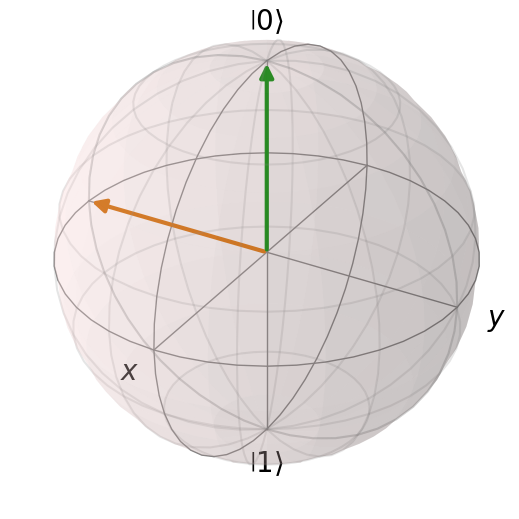

In [25]:
# rotate |0> state alon x axis by 90 degrees
psi=rotate_x(np.pi/2) * g_state
print("psi:",psi)

b = Bloch()
b.make_sphere()
b.add_states(g_state)
b.add_states(psi)
b.render()
b.show()


Next, let's perform a two-step rotation. First, we'll rotate the
$∣0\rangle$state around the Z-axis by 90 degrees, followed by a 90-degree rotation around the X-axis. Then, we'll reverse the order by rotating first around the X-axis and then around the Z-axis.

psi: Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.5-0.5j]
 [-0.5-0.5j]]


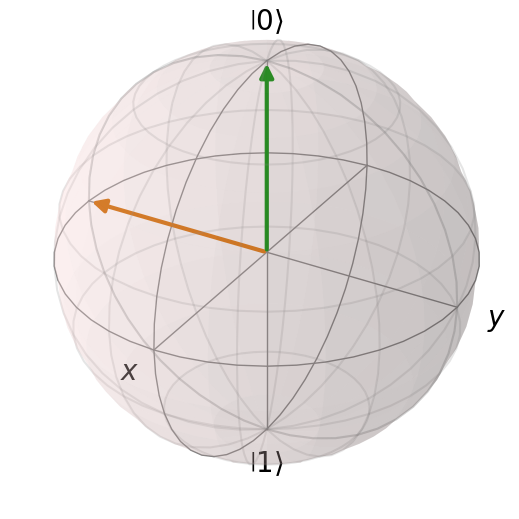

In [26]:
# Z axis rotation -> X axis rotation
psi=rotate_x(np.pi/2) * rotate_z(np.pi/2) * g_state
print("psi:",psi)

b = Bloch()
b.make_sphere()
b.add_states(g_state)
b.add_states(psi)
b.render()
b.show()

psi: Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.5-0.5j]
 [0.5-0.5j]]


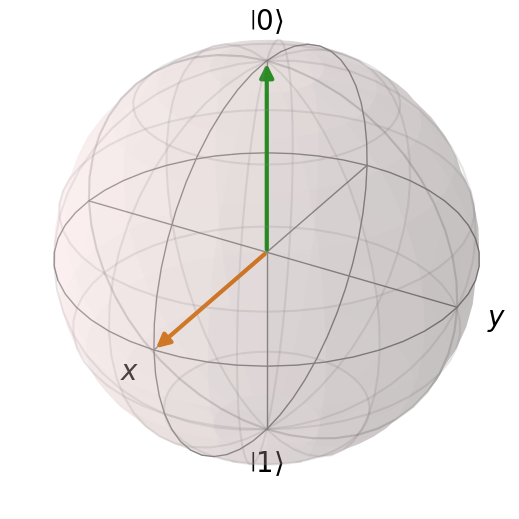

In [27]:
# X axis rotation -> Z axis rotation
psi=rotate_z(np.pi/2) * rotate_x(np.pi/2) * g_state
print("psi:",psi)

b = Bloch()
b.make_sphere()
b.add_states(g_state)
b.add_states(psi)
b.render()
b.show()

### Exercise 33:
$\hat{M}=\frac{\hat{X}+\hat{Z}}{\sqrt{2}}$ is a hermitian operator, so we can define a rotation $\exp(-i\alpha\hat{M}/2).$ See what this rotation does with QuTip.

In QuTip, the exponential of a matrix is returned by `expm()` method of `Qobj` instance.

Eigenvalues: [-1.  1.]
Eigenstates: [Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.38268343]
  [-0.92387953]]
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.92387953]
  [-0.38268343]]                                                       ]


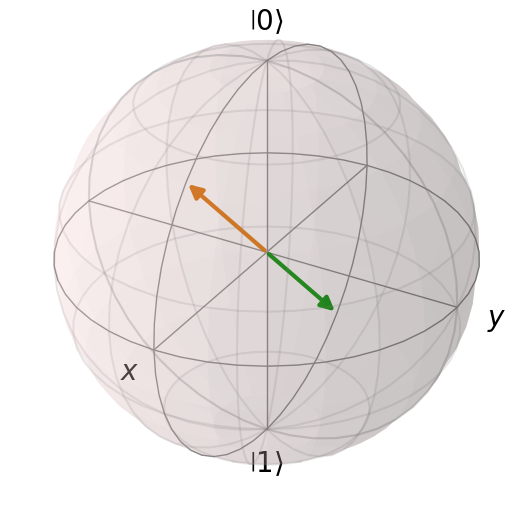

In [28]:
# First, we start with plotting the eigenstates of the operator
M=(sigmax()+sigmaz())/np.sqrt(2)
eigvals, eigstates = M.eigenstates()
print("Eigenvalues:",eigvals)
print("Eigenstates:",eigstates)

b = Bloch()
b.make_sphere()
b.add_states(eigstates)
b.render()
b.show()

In [29]:
import matplotlib as mpl
from matplotlib import cm
import imageio

def animate_bloch(states, eig_states, name, duration=0.1, save_all=False):

    b = qutip.Bloch()
    b.vector_color = ['r']
    # b.view = [-40,30]
    images=[]
    
    try:
        length = len(states)
    except:
        length = 1
        states = [states]
    ## normalize colors to the length of data ##
    # nrm = mpl.colors.Normalize(0,length)
    # colors = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

    ## customize sphere properties ##
    # b.point_color = [colors[0]] # options: 'r', 'g', 'b' etc.
    b.point_marker = ['o']
    b.point_size = [25]
    
    for i in range(length):
        b.clear()
        b.add_states(eig_states)
        b.add_states(states[i])
        b.add_states(states[:(i+1)],'point')
        if save_all:
            b.save(dirc='sphere') #saving images to tmp directory
            filename="sphere/bloch_%01d.png" % i
        else:
            filename='temp_file.png'
            b.save(filename)
        images.append(imageio.v2.imread(filename))
    imageio.mimsave(f'{name}.gif', images, duration=duration)

In [30]:
import qutip
alpha=np.pi/2
rotate_M=(-1j*alpha*M/2).expm()
up = qutip.basis(2, 0) # |0>
bloch_states = []
for alpha in np.linspace(0.0, 2*np.pi, 50):
    rotate_M=(-1j*alpha*M/2).expm()
    psi=rotate_M * up
    bloch_states.append(psi)

In [31]:
c = np.cos(np.pi/8)
s = np.sin(np.pi/8)
m1 = np.array([[c**2 , s*c], [c*s, s**2]])
m2 = np.array([[s**2, -s*c], [-s*c, c**2]])
U = np.exp(-1j * alpha /2 ) * m1 + np.exp(1j * alpha/2) * m2
assert np.allclose(rotate_M.full(), U) == True

In [32]:
animate_bloch(bloch_states, eigstates, 'm_x_z')

Eigenvalues: [-1.  1.]
Eigenstates: [Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.70710678+0.j ]
  [ 0.5       +0.5j]]
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.70710678+0.j ]
  [-0.5       -0.5j]]                                                  ]


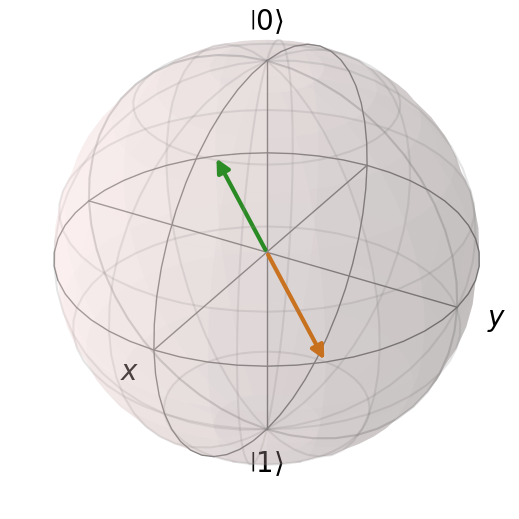

In [33]:
# First, we start with plotting the eigenstates of the operator
M=(sigmax()+sigmay())/np.sqrt(2)
eigvals, eigstates = M.eigenstates()
print("Eigenvalues:",eigvals)
print("Eigenstates:",eigstates)

b = Bloch()
b.make_sphere()
b.add_states(eigstates)
b.render()
b.show()

In [34]:
alpha=np.pi/2
rotate_M=(-1j*alpha*M/2).expm()
up = qutip.basis(2, 0) # |0>
bloch_states = []
for alpha in np.linspace(0.0, 2*np.pi, 50):
    rotate_M=(-1j*alpha*M/2).expm()
    psi=rotate_M * up
    bloch_states.append(psi)

In [35]:
animate_bloch(bloch_states, eigstates, 'm_x_y')

rotate_M: Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 7.07106781e-01-0.5j -3.90780084e-17-0.5j]
 [-6.35618898e-17-0.5j  7.07106781e-01+0.5j]]
psi: Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 7.07106781e-01-0.5j]
 [-6.35618898e-17-0.5j]]


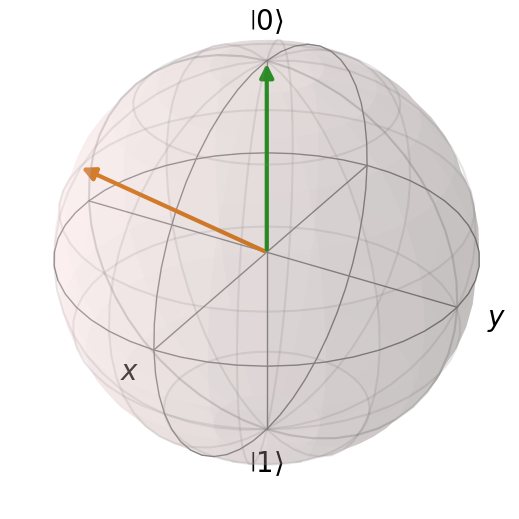

In [38]:
# Then, we see how the operator works on the quantum state
alpha=np.pi/2
rotate_M=(-1j*alpha*M/2).expm()
print("rotate_M:",rotate_M)

psi=rotate_M * g_state
print("psi:",psi)

b = Bloch()
b.make_sphere()
b.add_states(g_state)
b.add_states(psi)
b.render()
b.show()

# Commutator
Commutator is defined as
$$[\hat{A}, \hat{B}]\equiv \hat{A}\hat{B} - \hat{B}\hat{A}$$.

Then, pauli operators have such commutation relations.
$$[\sigma_i, \sigma_j]=2i\Sigma_{k=1}^3 \epsilon_{ijk}\sigma_k$$

In [ ]:
print(commutator(sigmax(), sigmay()))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]


In [ ]:
print(commutator(sigmay(), sigmaz()))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0.+0.j 0.+2.j]
 [0.+2.j 0.+0.j]]


In [ ]:
print(commutator(sigmaz(), sigmax()))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 0.  2.]
 [-2.  0.]]


#Expectation values
$$\langle\hat{Z}\rangle\equiv\langle\Psi|\hat{Z}|\Psi\rangle$$

In QuTip, the expectation values of the operators can be calculated by vector multiplications or `expect` function. (`expect` function is compatible with density matrices.)

In [ ]:
# expectation value of sigma z and sigma x of |0> sate
print("expectation of sigmaZ:",g_state.dag() * sigmaz() * g_state)
print("expectation of sigmaX:",g_state.dag() * sigmax() * g_state)

expectation of sigmaZ: (1+0j)
expectation of sigmaX: 0j


In [ ]:
# use expect function
print("expectation of sigmaZ:",expect(sigmaz(), g_state))
print("expectation of sigmaX:",expect(sigmax(), g_state))

expectation of sigmaZ: 1.0
expectation of sigmaX: 0.0
